In [ ]:
# Semantic Product Search and Ranking
# interpreting meaning of words and phrases in the context of product searches
# understand query and return meaning of query
# understand input query, search for relevant products, and rank them based on highest to lowest matches
# training data -> query-result pairs
# deploy model on web application
# put Amazon dataset in a database and create a simple web interface with a text box
# user will enter query to the model, which will find the matched products
# display these results on the web
# use query , product title and product description
# recommendation use BERT to see if this works

# Requirements
# - Load all the data set, combine product_title and product_description columns which will be used for searching.
# - Perform text preprocessing: Convert all to lower case, remove stopwords, perform Lemmatization or Stemming, remove Special Character
# - Convert text data into numerical representations. Common techniques include: TF-IDF (Term Frequency-Inverse Document Frequency), Word Embeddings (e.g., Word2Vec, GloVe, FastText) for capturing semantic meaning. You can also use Pretrained Language Models (e.g., BERT, GPT) for text representation.
# - Divide the dataset into training, validation, and testing sets. Common splits include 70- 80% for training, 10-15% for validation, and 10-15% for testing.
# - Select a suitable deep-learning model for training and testing on the given dataset.
# - Visualization of the training and testing errors
# - Fine-tune the model hyper parameters.
# - Select appropriate evaluation metrics for your problem, such as NDCG, MAP, Precision at K (P@K), Recall at K (R@K), F1 at K (R@K) or any relevant metric.
# - Deploy the model such that it can be served in the web application. Allow the user to enter a query and it should return the closest matched products.
# - Write a detailed description of your solution and the challenges that you face as a report under Experimental Results Section. Show the accuracies obtained for the task and summarize them as a table.


In [ ]:
#loading data
import pandas as pd
import pandas as pd
df_examples = pd.read_parquet('./datasets/shopping_queries_dataset_examples.parquet')
df_products = pd.read_parquet('./datasets/shopping_queries_dataset_products.parquet')
df_sources = pd.read_csv("./datasets/shopping_queries_dataset_sources.csv")

In [ ]:
df_examples.head(1)

,example_id,query,query_id,product_id,product_locale,esci_label,small_version,large_version,split
0,0,revent 80 cfm,0,B000MOO21W,us,I,0,1,train


In [ ]:
df_products.head(1)

,product_id,product_title,product_description,product_bullet_point,product_brand,product_color,product_locale
0,B079VKKJN7,"11 Degrees de los Hombres Playera con Logo, Ne...",Esta playera con el logo de la marca Carrier d...,11 Degrees Negro Playera con logo\nA estrenar ...,11 Degrees,Negro,es


In [ ]:
df_sources.head(1)

,query_id,source
0,0,other


In [ ]:
print(df_examples.shape)
print(df_products.shape)
print(df_sources.shape)

(2621288, 9)
(1814924, 7)
(130652, 2)


In [ ]:
df_examples_products = pd.merge(
    df_examples,
    df_products,
    how='left',
    left_on=['product_locale','product_id'],
    right_on=['product_locale', 'product_id']
)

In [ ]:
df_examples_products_source = pd.merge(
    df_examples_products,
    df_sources,
    how='left',
    left_on=['query_id'],
    right_on=['query_id']
)

In [ ]:
df_examples_products_source = df_examples_products_source[df_examples_products_source["esci_label"] == 'E']

In [ ]:
df_examples_products_source = df_examples_products_source[df_examples_products_source["product_locale"] == 'us']

In [ ]:
df_examples_products_source

,example_id,query,query_id,product_id,product_locale,esci_label,small_version,large_version,split,product_title,product_description,product_bullet_point,product_brand,product_color,source
1,1,revent 80 cfm,0,B07X3Y6B1V,us,E,0,1,train,Homewerks 7141-80 Bathroom Fan Integrated LED ...,None,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,80 CFM,other
2,2,revent 80 cfm,0,B07WDM7MQQ,us,E,0,1,train,Homewerks 7140-80 Bathroom Fan Ceiling Mount E...,None,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,White,other
3,3,revent 80 cfm,0,B07RH6Z8KW,us,E,0,1,train,Delta Electronics RAD80L BreezRadiance 80 CFM ...,This pre-owned or refurbished product has been...,Quiet operation at 1.5 sones\nBuilt-in thermos...,DELTA ELECTRONICS (AMERICAS) LTD.,White,other
4,4,revent 80 cfm,0,B07QJ7WYFQ,us,E,0,1,train,Panasonic FV-08VRE2 Ventilation Fan with Reces...,None,The design solution for Fan/light combinations...,Panasonic,White,other
5,5,revent 80 cfm,0,B076Q7V5WX,us,E,0,1,train,Panasonic FV-0511VQ1 WhisperCeiling DC Ventila...,None,Installation: Features a 4-inch or 6-inch duct...,Panasonic,White,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618563,2618563,자전거트레일러,130539,B07ZFJJZLF,us,E,1,1,train,"LivTee 5 pcs Auto Trim Removal Tool Kit, Inter...","5 pcs Auto Trim Removal Tool Kit, Interior Doo...",Made of super durable plastic material for lon...,LivTee,Blue,other
2618564,2618564,자전거트레일러,130539,B07G5VLMN1,us,E,1,1,train,MAXXHAUL 50025 Hitch Mounted 2-Bike Rack-100 l...,None,Improved durable hitch adapter to fit standard...,MAXXHAUL,None,other
2618566,2618566,자전거트레일러,130539,B010LLGWL8,us,E,1,1,train,"Burley Honey Bee, 2 Seat Kids Bike Trailer & S...",None,Sport Type: Cycling,Burley Design,Red,other
2618567,2618567,자전거트레일러,130539,B010LLGWKE,us,E,1,1,train,"BURLEY Design Bee, 2 Seat, Lightweight, Kids B...",None,sport type: Cycling,Burley Design,Yellow,other


In [ ]:
df_examples_products_source.shape

(1247558, 15)

In [ ]:
#dropping all queries not in english
import langid
# Function to detect language using langid
def detect_language(text):
    lang, _ = langid.classify(text)
    return lang == 'en'

import swifter

df_examples_products_source['query'] = df_examples_products_source['query'].swifter.apply(detect_language)

Pandas Apply:   0%|          | 0/1247558 [00:00<?, ?it/s]

/var/folders/xk/bhmy4bbx4bx0zcb40qwkzw8w0000gp/T/ipykernel_28397/3356544802.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_examples_products_source['query'] = df_examples_products_source['query'].swifter.apply(detect_language)


In [ ]:
df_examples_products_source.to_csv('examples_products_source_dataframe.csv', index=False)
#all english sources

In [ ]:
import pandas as pd
df_examples_products_source = pd.read_csv('examples_products_source_dataframe.csv')

In [ ]:
df_examples_products_source.head(2)
#1247558 rows × 15 columns

,example_id,query,query_id,product_id,product_locale,esci_label,small_version,large_version,split,product_title,product_description,product_bullet_point,product_brand,product_color,source
0,1,True,0,B07X3Y6B1V,us,E,0,1,train,Homewerks 7141-80 Bathroom Fan Integrated LED ...,NaN,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,80 CFM,other
1,2,True,0,B07WDM7MQQ,us,E,0,1,train,Homewerks 7140-80 Bathroom Fan Ceiling Mount E...,NaN,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,White,other


In [ ]:
df_examples_products_source['product_detail'] = (
    df_examples_products_source['product_title'].fillna('') +
    " " +
    df_examples_products_source['product_description'].fillna('')
)


In [ ]:
df_examples_products_source.drop('product_title', axis=1, inplace=True)

KeyError: "['product_title'] not found in axis"

In [ ]:
df_examples_products_source.drop('product_description', axis=1, inplace=True)

In [ ]:
df_examples_products_source.head(1)

,example_id,query,query_id,product_id,product_locale,esci_label,small_version,large_version,split,product_bullet_point,product_brand,product_color,source,product_detail
0,1,True,0,B07X3Y6B1V,us,E,0,1,train,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,80 CFM,other,Homewerks 7141-80 Bathroom Fan Integrated LED ...


In [ ]:
# Specify the columns to drop

# example_id	query	query_id	product_id	product_locale	esci_label	small_version	large_version	split	product_title	product_description	product_bullet_point	product_brand	product_color	source	product_details
columns_to_drop = ['product_locale', 'esci_label', 'small_version', 'large_version', 'split', 'product_bullet_point', 'product_brand', 'product_color']

# Drop the specified columns
df_examples_products_source = df_examples_products_source.drop(columns=columns_to_drop)

In [ ]:
df_examples_products_source.head(2)

,example_id,query,query_id,product_id,source,product_detail
0,1,True,0,B07X3Y6B1V,other,Homewerks 7141-80 Bathroom Fan Integrated LED ...
1,2,True,0,B07WDM7MQQ,other,Homewerks 7140-80 Bathroom Fan Ceiling Mount E...


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def text_preprocessing(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a string
    preprocessed_text = ' '.join(words)

    return preprocessed_text



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zeerakzubair/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zeerakzubair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zeerakzubair/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# applying preprocessing on query and product detail

df_examples_products_source['product_detail'] = df_examples_products_source['product_detail'].apply(text_preprocessing)


In [ ]:
df_examples_products_source.to_csv('preprocessed_data.csv', index=False)

NameError: name 'df_examples_products_source' is not defined

In [ ]:
import pandas as pd
df_examples_products_source = pd.read_csv('preprocessed_data.csv')

In [ ]:
df_examples = pd.read_parquet('./datasets/shopping_queries_dataset_examples.parquet')


In [ ]:
df_examples.shape

(2621288, 9)

In [ ]:
df_examples.head(2)

,example_id,query,query_id,product_id,product_locale,esci_label,small_version,large_version,split
0,0,revent 80 cfm,0,B000MOO21W,us,I,0,1,train
1,1,revent 80 cfm,0,B07X3Y6B1V,us,E,0,1,train


In [ ]:
df_examples = df_examples[df_examples['product_locale'] == 'us']

In [ ]:
df_examples.shape

(1818825, 9)

In [ ]:
df_examples = df_examples[df_examples['esci_label'] == 'E']

In [ ]:
df_examples.shape

(1247558, 9)

In [ ]:
# view the result of this representation

In [ ]:
df_examples_products_source.shape

(1247558, 6)

In [ ]:
df_examples_products_source['query'] = df_examples['query']

In [ ]:
df_examples_products_source.head(2)

,example_id,query,query_id,product_id,source,product_detail
0,1,NaN,0,B07X3Y6B1V,other,homewerks bathroom fan integrated led light ce...
1,2,revent 80 cfm,0,B07WDM7MQQ,other,homewerks bathroom fan ceiling mount exhaust v...


In [ ]:
df_examples_products_source.to_csv('preprocessed_data.csv', index=False)

In [ ]:
df_examples_products_source['query'] = df_examples_products_source['query'].fillna('')  # Replace NaN with empty string


In [ ]:
# -----------------------------------HERE DUMMY-----------------------------

In [ ]:
import pandas as pd
df_examples_products_source = pd.read_csv('preprocessed_data.csv')
df_examples_products_source

,example_id,query,query_id,product_id,source,product_detail
0,1,NaN,0,B07X3Y6B1V,other,homewerks bathroom fan integrated led light ce...
1,2,revent 80 cfm,0,B07WDM7MQQ,other,homewerks bathroom fan ceiling mount exhaust v...
2,3,revent 80 cfm,0,B07RH6Z8KW,other,delta electronics radl breezradiance cfm heate...
3,4,revent 80 cfm,0,B07QJ7WYFQ,other,panasonic fvvre ventilation fan recessed led r...
4,5,revent 80 cfm,0,B076Q7V5WX,other,panasonic fvvq whisperceiling dc ventilation f...
...,...,...,...,...,...,...
1247553,2618563,loftek,130539,B07ZFJJZLF,other,livtee pc auto trim removal tool kit interior ...
1247554,2618564,loftek,130539,B07G5VLMN1,other,maxxhaul hitch mounted bike rack lb capacity
1247555,2618566,loftek,130539,B010LLGWL8,other,burley honey bee seat kid bike trailer strolle...
1247556,2618567,lofters for men,130539,B010LLGWKE,other,burley design bee seat lightweight kid bikeonl...


In [ ]:
# Drop the specified columns
columns_to_drop = ['example_id','query_id','product_id','source']
df_examples_products_source = df_examples_products_source.drop(columns=columns_to_drop)
df_examples_products_source

,query,product_detail
0,NaN,homewerks bathroom fan integrated led light ce...
1,revent 80 cfm,homewerks bathroom fan ceiling mount exhaust v...
2,revent 80 cfm,delta electronics radl breezradiance cfm heate...
3,revent 80 cfm,panasonic fvvre ventilation fan recessed led r...
4,revent 80 cfm,panasonic fvvq whisperceiling dc ventilation f...
...,...,...
1247553,loftek,livtee pc auto trim removal tool kit interior ...
1247554,loftek,maxxhaul hitch mounted bike rack lb capacity
1247555,loftek,burley honey bee seat kid bike trailer strolle...
1247556,lofters for men,burley design bee seat lightweight kid bikeonl...


In [1]:
df_examples_products_source.to_csv('/content/query_product_detail.csv', index=False)

NameError: ignored

In [ ]:
##------------------------HERE DUMMY------------------------

In [1]:
import pandas as pd
num_rows = 10000
df_examples_products_source = pd.read_csv('/content/query_product_detail.csv', nrows=num_rows)

In [2]:
# Assuming df_examples_products_source is your DataFrame
# X: 'query', y: 'product_detail'
X = df_examples_products_source['query'].fillna('')  # Handle NaN values
y = df_examples_products_source['product_detail'].fillna('')

In [3]:
print(X[1])

 revent 80 cfm


In [4]:
print(y[1])

homewerks bathroom fan ceiling mount exhaust ventilation sone cfm white


In [5]:
# #this is from the first attempt led to kernel crash
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Convert text data to numerical representation using TF-IDF
# vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
# X_train_tfidf = vectorizer.fit_transform(X_train)
# X_test_tfidf = vectorizer.transform(X_test)

# # Train a logistic regression classifier
# model = LogisticRegression(max_iter=250)
# model.fit(X_train_tfidf, y_train)

# # Predictions on the test set
# y_pred = model.predict(X_test_tfidf)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Additional evaluation metrics
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))


In [6]:
# # trying to use BERT
# import torch
# from transformers import BertTokenizer, BertForSequenceClassification
# from torch.nn.functional import softmax

# # Load pre-trained BERT model and tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)

# # Encode the input query
# input_query = "revent 80 cfm"
# encoded_input = tokenizer(input_query, return_tensors='pt')

# # Make a prediction
# with torch.no_grad():
#     output = model(**encoded_input)

# # Get the predicted class probabilities
# probabilities = softmax(output.logits, dim=1).numpy()

# # Print or use the probabilities as needed
# print(probabilities)


In [7]:
#using TF-IDF
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF on the 'query' column
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Display the TF-IDF results
print(tfidf_df)


       00  030   05   09   10  100  10an   11   12   13  ...  yell  yellow  \
0     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0     0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0     0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0     0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0     0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0     0.0   
...   ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...   ...     ...   
9995  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0     0.0   
9996  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0     0.0   
9997  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0     0.0   
9998  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0     0.0   
9999  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...   0.0     0.0   

      yes  yinseng  yogourt  you  your  zer0  zero  zipper  
0 

In [8]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create a heatmap using Seaborn
# plt.figure(figsize=(10, 6))
# sns.heatmap(tfidf_df, cmap='viridis', annot=True, fmt=".2f", xticklabels=1)
# plt.title('TF-IDF Heatmap for Queries')
# plt.xlabel('Terms')
# plt.ylabel('Queries')
# plt.show()

Vector for 'revent': [-6.45882711e-02  1.25115946e-01  9.49685052e-02 -1.57833267e-02
 -8.76573322e-04 -1.53892815e-01  2.61672661e-02  2.69331336e-01
 -9.23583582e-02 -5.16245258e-04 -3.00307199e-02 -1.17860816e-01
  4.30506840e-02  1.31633610e-01  1.87770894e-03  7.36792684e-02
  5.53598953e-03 -8.46572593e-02 -7.49957785e-02 -2.30282888e-01
  8.24799091e-02 -1.62505265e-02  2.34182272e-02 -6.35311753e-02
 -2.40757298e-02 -1.50871510e-02  1.12951333e-02 -1.13433927e-01
 -8.02987814e-02  6.10004999e-02 -2.29835063e-02 -3.57968360e-02
  3.90314683e-02 -1.37149252e-03 -3.79995108e-02  3.10870763e-02
 -1.95079222e-02 -6.55748695e-02 -2.73923147e-02 -2.38412604e-01
  2.74371002e-02  1.26697376e-01 -1.14829205e-01  4.29178216e-02
  1.04570098e-01 -8.39536265e-02 -2.15847969e-01 -3.77427880e-03
  6.72004670e-02 -2.09457963e-03  1.90313924e-02 -1.06901847e-01
  5.49087226e-02  7.50512034e-02  9.08228830e-02  1.49502773e-02
  1.05261952e-01 -9.21517387e-02 -5.18727228e-02 -2.42772270e-02
 -5.

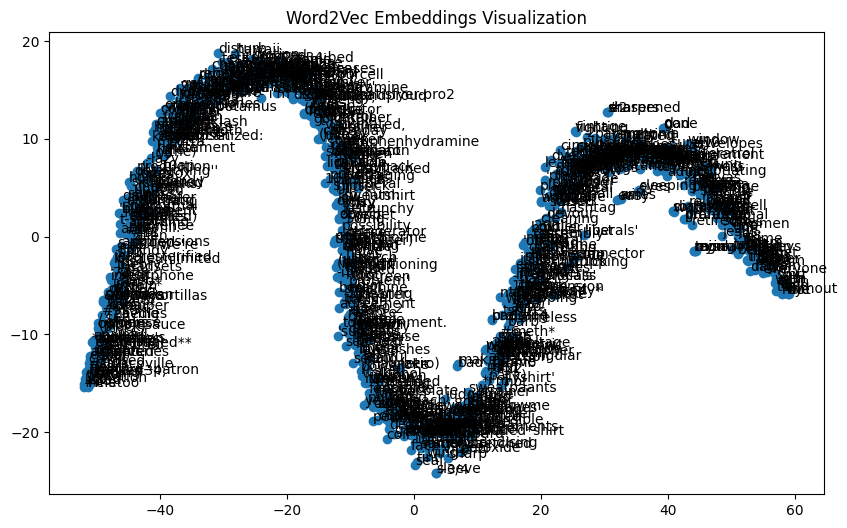

In [9]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Tokenize the sentences into words
tokenized_queries = [query.split() for query in X]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_queries, vector_size=100, window=5, min_count=1, workers=4)

# Example: Get the vector representation of a word
vector_revent = word2vec_model.wv['revent']
print("Vector for 'revent':", vector_revent)

# Visualization using t-SNE
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(word2vec_model.wv.vectors)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

# Annotate points with corresponding words
for i, txt in enumerate(word2vec_model.wv.index_to_key):
    plt.annotate(txt, (X_embedded[i, 0], X_embedded[i, 1]))

plt.title('Word2Vec Embeddings Visualization')
plt.show()

In [11]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 25.6 MB/s eta 0:00:00


In [17]:
X  = df_examples_products_source['query'].values.tolist()

In [26]:
df_examples_products_source = df_examples_products_source.dropna()

In [27]:
df_examples_products_source.shape

(2855, 2)

In [28]:
df_examples_products_source['query'].shape

(2855,)

In [33]:
X = df_examples_products_source['query'].to_list()

In [35]:
len(X)

2855

In [36]:
X

[' revent 80 cfm',
 ' revent 80 cfm',
 ' revent 80 cfm',
 ' revent 80 cfm',
 ' revent 80 cfm',
 ' revent 80 cfm',
 ' revent 80 cfm',
 ' revent 80 cfm',
 ' revent 80 cfm',
 ' revent 80 cfm',
 ' revent 80 cfm',
 ' revent 80 cfm',
 ' revent 80 cfm',
 ' revent 80 cfm',
 '!awnmower tires without rims',
 '!awnmower tires without rims',
 '!awnmower tires without rims',
 '!awnmower tires without rims',
 '!awnmower tires without rims',
 '!awnmower tires without rims',
 '!awnmower tires without rims',
 '!qscreen fence without holes',
 '!qscreen fence without holes',
 '!qscreen fence without holes',
 '!qscreen fence without holes',
 '!qscreen fence without holes',
 '!qscreen fence without holes',
 '!qscreen fence without holes',
 '!qscreen fence without holes',
 '!qscreen fence without holes',
 '!qscreen fence without holes',
 '# 10 self-seal envelopes without window',
 '# 10 self-seal envelopes without window',
 '# 10 self-seal envelopes without window',
 '# 10 self-seal envelopes without window

<ipython-input-38-09cbd6cb8bdc>:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], cmap='viridis')


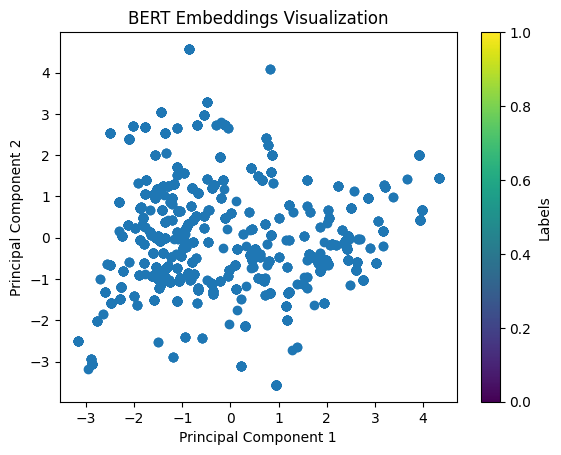

In [38]:
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt

# Assuming X contains your queries and y contains corresponding labels

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize and encode the input sequence
input_sequence = tokenizer(X, return_tensors='pt', padding=True, truncation=True)

# Forward pass to get model outputs
with torch.no_grad():
    outputs = model(**input_sequence)

# Extract embeddings from the last hidden layer
last_hidden_states = outputs.last_hidden_state

# Average the embeddings across each token to get a single vector for each example
average_embeddings = last_hidden_states.mean(dim=1)

# Perform dimensionality reduction (e.g., PCA) for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(average_embeddings)

# Visualize the embeddings
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], cmap='viridis')
plt.title('BERT Embeddings Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Labels')
plt.show()


In [24]:
# Assuming X is a variable representing your data
is_list_of_strings = all(isinstance(element, str) for element in X)

if is_list_of_strings:
    print("X is a list of strings.")
else:
    print("X is not a list of strings.")


X is not a list of strings.


In [4]:
import numpy as np
import pandas as pd
num_rows = 300000
df_examples_products_source = pd.read_csv('query_product_detail.csv', nrows=num_rows)
df_examples_products_source = df_examples_products_source.dropna()
df_examples_products_source.shape

(140568, 2)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df_examples_products_source is your DataFrame
X = df_examples_products_source['query']
y = df_examples_products_source['product_detail']

# Encode 'product_detail'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert 'query' to TF-IDF representation
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)


# Split the data into training (80%), validation (10%), and testing (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [6]:
# Assuming df_examples_products_source is your DataFrame
unique_product_details = df_examples_products_source['product_detail'].unique()
num_classes = len(unique_product_details)

print("Number of Classes (num_classes):", num_classes)


Number of Classes (num_classes): 122828


In [1]:
# import tensorflow as tf

# # Reorder sparse matrices
# X_train = tf.sparse.reorder(X_train)
# X_val = tf.sparse.reorder(X_val)


In [9]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report

# Check if GPU is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tokenize the input data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_texts = [tokenizer.encode(query, add_special_tokens=True) for query in X]

# Padding and Truncating
max_len = max(len(tokens) for tokens in tokenized_texts)
padded_texts = [tokens + [0] * (max_len - len(tokens)) for tokens in tokenized_texts]

# Convert to PyTorch tensors
input_ids = torch.tensor(padded_texts).to(device)
attention_masks = torch.where(input_ids != 0, torch.tensor(1).to(device), torch.tensor(0).to(device))
labels = torch.tensor(y_encoded).to(device)

# Create DataLoader
dataset = TensorDataset(input_ids, attention_masks, labels)
train_loader = DataLoader(dataset, batch_size=32)

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)
model.to(device)

# Fine-tune the model
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
epochs = 3
for epoch in range(epochs):
    model.train()
    for batch in train_loader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        outputs = model(**inputs)
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
with torch.no_grad():
    predictions = []
    for batch in validation_loader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1]}
        outputs = model(**inputs)
        logits = outputs.logits
        predictions.extend(logits.argmax(dim=1).cpu().detach().numpy())

# Decode predictions back to original labels
decoded_predictions = label_encoder.inverse_transform(predictions)

# Print classification report
print(classification_report(y_val, decoded_predictions))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyboardInterrupt: 